<a href="https://colab.research.google.com/github/takayama-rado/trado_samples/blob/main/colab_files/gislr_rnn_islr_model_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Download dataset and modules

In [1]:
from google.colab import drive

drive.mount("/content/drive")

Mounted at /content/drive


In [2]:
# Copy to local.
!cp drive/MyDrive/Datasets/gislr_dataset_top10.zip gislr_top10.zip
!cp drive/MyDrive/Datasets/gislr_dataset_top30.zip gislr_top30.zip

In [3]:
!unzip -o gislr_top10.zip
!unzip -o gislr_top30.zip

Archive:  gislr_top10.zip
   creating: dataset_top10/
  inflating: dataset_top10/16069.hdf5  
  inflating: dataset_top10/18796.hdf5  
  inflating: dataset_top10/2044.hdf5  
  inflating: dataset_top10/22343.hdf5  
  inflating: dataset_top10/25571.hdf5  
  inflating: dataset_top10/26734.hdf5  
  inflating: dataset_top10/27610.hdf5  
  inflating: dataset_top10/28656.hdf5  
  inflating: dataset_top10/29302.hdf5  
  inflating: dataset_top10/30680.hdf5  
  inflating: dataset_top10/32319.hdf5  
  inflating: dataset_top10/34503.hdf5  
  inflating: dataset_top10/36257.hdf5  
  inflating: dataset_top10/37055.hdf5  
  inflating: dataset_top10/37779.hdf5  
  inflating: dataset_top10/4718.hdf5  
  inflating: dataset_top10/49445.hdf5  
  inflating: dataset_top10/53618.hdf5  
  inflating: dataset_top10/55372.hdf5  
  inflating: dataset_top10/61333.hdf5  
  inflating: dataset_top10/62590.hdf5  
  inflating: dataset_top10/LICENSE.txt  
  inflating: dataset_top10/sign_to_prediction_index_map.json  
Arch

In [4]:
!ls dataset_top10
!ls dataset_top30

16069.hdf5  25571.hdf5	29302.hdf5  36257.hdf5	49445.hdf5  62590.hdf5
18796.hdf5  26734.hdf5	30680.hdf5  37055.hdf5	53618.hdf5  LICENSE.txt
2044.hdf5   27610.hdf5	32319.hdf5  37779.hdf5	55372.hdf5  sign_to_prediction_index_map.json
22343.hdf5  28656.hdf5	34503.hdf5  4718.hdf5	61333.hdf5
16069.hdf5  25571.hdf5	29302.hdf5  36257.hdf5	49445.hdf5  62590.hdf5
18796.hdf5  26734.hdf5	30680.hdf5  37055.hdf5	53618.hdf5  LICENSE.txt
2044.hdf5   27610.hdf5	32319.hdf5  37779.hdf5	55372.hdf5  sign_to_prediction_index_map.json
22343.hdf5  28656.hdf5	34503.hdf5  4718.hdf5	61333.hdf5


In [5]:
!cat dataset_top10/sign_to_prediction_index_map.json
!cat dataset_top30/sign_to_prediction_index_map.json

{
    "listen": 0,
    "look": 1,
    "shhh": 2,
    "donkey": 3,
    "mouse": 4,
    "duck": 5,
    "uncle": 6,
    "hear": 7,
    "pretend": 8,
    "cow": 9
}{
    "listen": 0,
    "look": 1,
    "shhh": 2,
    "donkey": 3,
    "mouse": 4,
    "duck": 5,
    "uncle": 6,
    "hear": 7,
    "pretend": 8,
    "cow": 9,
    "bird": 10,
    "brown": 11,
    "who": 12,
    "sleepy": 13,
    "toothbrush": 14,
    "nuts": 15,
    "lips": 16,
    "bye": 17,
    "fireman": 18,
    "wake": 19,
    "awake": 20,
    "doll": 21,
    "cat": 22,
    "drink": 23,
    "pen": 24,
    "think": 25,
    "icecream": 26,
    "make": 27,
    "yesterday": 28,
    "first": 29
}

In [6]:
!cat dataset_top10/LICENSE.txt
!cat dataset_top30/LICENSE.txt

The dataset provided by Natsuki Takayama (Takayama Research and Development Office) is licensed under CC-BY 4.0.
Author: Copyright 2024 Natsuki Takayama
Title: GISLR Top 10 dataset
Original licenser: Deaf Professional Arts Network and the Georgia Institute of Technology
Modification
- Extract 10 most frequent words.
- Packaged into HDF5 format.
The dataset provided by Natsuki Takayama (Takayama Research and Development Office) is licensed under CC-BY 4.0.
Author: Copyright 2024 Natsuki Takayama
Title: GISLR Top 30 dataset
Original licenser: Deaf Professional Arts Network and the Georgia Institute of Technology
Modification
- Extract 30 most frequent words.
- Packaged into HDF5 format.


In [7]:
import h5py
with h5py.File("dataset_top10/16069.hdf5", "r") as fread:
    keys = list(fread.keys())
    print(keys)
    group = fread[keys[0]]
    print(group.keys())
    feature = group["feature"][:]
    token = group["token"][:]
    print(feature.shape)
    print(token)

['1109479272', '11121526', '1120349077', '1125456612', '1159046211', '1169128497', '1186032553', '1223803476', '1259708636', '1281972067', '129232566', '1334702305', '1340979012', '1352964057', '1370052047', '1383455381', '1431148933', '1435203624', '1437919781', '1458770030', '1462881097', '1469867050', '1474050058', '147607644', '1513539919', '1520635928', '1524297234', '153676122', '1537751003', '1542212461', '1551759770', '158232956', '1585855916', '1632709119', '1638742455', '1696757219', '177479476', '1779635114', '1791684792', '1801566440', '1831167282', '1867385690', '1880570146', '1901587887', '1910121429', '1919659282', '192873038', '1935012113', '1949620203', '195098847', '1983552660', '1989475963', '1998715062', '2007709802', '2036010239', '2036360025', '2046296211', '2082116372', '2098813002', '2109640010', '2121879330', '2141852087', '2148832702', '2152013823', '2166805079', '2176613834', '2184232774', '2213965523', '2249630763', '2256677805', '2263287955', '2263683020', 

In [8]:
!wget https://github.com/takayama-rado/trado_samples/archive/master.zip

--2024-02-13 08:20:58--  https://github.com/takayama-rado/trado_samples/archive/master.zip
Resolving github.com (github.com)... 20.205.243.166
Connecting to github.com (github.com)|20.205.243.166|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://codeload.github.com/takayama-rado/trado_samples/zip/main [following]
--2024-02-13 08:20:58--  https://codeload.github.com/takayama-rado/trado_samples/zip/main
Resolving codeload.github.com (codeload.github.com)... 20.205.243.165
Connecting to codeload.github.com (codeload.github.com)|20.205.243.165|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [application/zip]
Saving to: ‘master.zip’

master.zip              [             <=>    ]  73.81M  13.2MB/s    in 5.6s    

2024-02-13 08:21:04 (13.2 MB/s) - ‘master.zip’ saved [77396642]



In [9]:
!unzip -o master.zip -d master

Archive:  master.zip
15fefd929ed585c7e75b3504584afb6ff23bd3d5
   creating: master/trado_samples-main/
  inflating: master/trado_samples-main/.gitignore  
  inflating: master/trado_samples-main/LICENSE  
  inflating: master/trado_samples-main/README.md  
   creating: master/trado_samples-main/colab_files/
 extracting: master/trado_samples-main/colab_files/.gitkeep  
  inflating: master/trado_samples-main/colab_files/exp_affine_np_einsum.ipynb  
  inflating: master/trado_samples-main/colab_files/exp_jax_static.ipynb  
  inflating: master/trado_samples-main/colab_files/exp_mpholistic_0.ipynb  
  inflating: master/trado_samples-main/colab_files/exp_mpothers_0.ipynb  
  inflating: master/trado_samples-main/colab_files/exp_track_affine_jax.ipynb  
  inflating: master/trado_samples-main/colab_files/exp_track_affine_numpy.ipynb  
  inflating: master/trado_samples-main/colab_files/exp_track_affine_tensorflow.ipynb  
  inflating: master/trado_samples-main/colab_files/exp_track_affine_torch.ipynb

In [10]:
!mv master/trado_samples-main/src/modules_gislr .

In [11]:
!rm -rf master master.zip gislr_top10.zip gislr_top30.zip

In [12]:
!ls

dataset_top10  dataset_top30  drive  modules_gislr  sample_data


# 2. Load library

In [13]:
import json
import math
import sys
import time
from functools import partial
from pathlib import Path
from typing import (
    Any,
    Dict
)

# Third party's modules
import numpy as np

import torch
from torch import nn
from torch.nn import functional as F
from torch.utils.data import (
    DataLoader)

from torchvision.transforms import Compose

# Local modules
sys.path.append("modules_gislr")
from modules_gislr.dataset import (
    HDF5Dataset,
    merge_padded_batch)
from modules_gislr.defines import (
    get_fullbody_landmarks
)
from modules_gislr.layers import (
    GPoolRecognitionHead
)
from modules_gislr.train_functions import (
    test_loop,
    val_loop,
    train_loop
)
from modules_gislr.transforms import (
    PartsBasedNormalization,
    ReplaceNan,
    SelectLandmarksAndFeature,
    ToTensor
)

# 3. Implement RNN ISLR model

## RNN encoder

In [14]:
class RNNEncoder(nn.Module):
    def __init__(self,
                 in_channels,
                 out_channels,
                 rnn_type,
                 num_layers,
                 activation,
                 bidir,
                 dropout,
                 apply_mask,
                 proj_size=0):
        super().__init__()
        assert rnn_type in ["srnn", "lstm", "gru"]

        # If num_layers = 1, we remove dropout option of RNN layers to avoid warning.
        rnn_dropout = 0.0 if num_layers == 1 else dropout

        if rnn_type == "srnn":
            self.rnn = nn.RNN(input_size=in_channels,
                              hidden_size=out_channels,
                              num_layers=num_layers,
                              nonlinearity=activation,
                              batch_first=True,
                              dropout=rnn_dropout,
                              bidirectional=bidir)
        elif rnn_type == "lstm":
            self.rnn = nn.LSTM(input_size=in_channels,
                               hidden_size=out_channels,
                               num_layers=num_layers,
                               batch_first=True,
                               dropout=rnn_dropout,
                               bidirectional=bidir,
                               proj_size=proj_size)
        elif rnn_type == "gru":
            self.rnn = nn.GRU(input_size=in_channels,
                              hidden_size=out_channels,
                              num_layers=num_layers,
                              batch_first=True,
                              dropout=rnn_dropout,
                              bidirectional=bidir)
        # Dropout is added into intermediate RNN layers expect the last layer.
        # So, we add Dropout layer for the last layer explicitly.
        if dropout > 0:
            self.dropout = nn.Dropout(dropout)
        else:
            self.dropout = nn.Identity()

        self.num_layers = num_layers
        self.apply_mask = apply_mask

    def forward(self, feature, feature_pad_mask=None):
        if feature_pad_mask is not None and self.apply_mask:
            tlength = feature_pad_mask.sum(axis=-1).detach().cpu()
            feature = nn.utils.rnn.pack_padded_sequence(
                feature, tlength, batch_first=True, enforce_sorted=False)

        if isinstance(self.rnn, nn.LSTM):
            hidden_seqs, (last_hstate, last_cstate) = self.rnn(feature)
        else:
            hidden_seqs, last_hstate = self.rnn(feature)
            last_cstate = None
        # Unpack hidden sequence.
        if isinstance(hidden_seqs, nn.utils.rnn.PackedSequence):
            hidden_seqs = nn.utils.rnn.unpack_sequence(hidden_seqs)
            # Back list to padded batch.
            hidden_seqs = nn.utils.rnn.pad_sequence(
                hidden_seqs, batch_first=True, padding_value=0.0)
        hidden_seqs = self.dropout(hidden_seqs)

        return hidden_seqs, last_hstate, last_cstate

## ISLR model

In [15]:
class RNNISLR(nn.Module):
    def __init__(self,
                 in_channels,
                 hidden_channels,
                 out_channels,
                 rnn_type="lstm",
                 rnn_num_layers=1,
                 rnn_activation="tanh",
                 rnn_bidir=False,
                 rnn_dropout=0.1,
                 masking_type="both"):
        super().__init__()
        assert rnn_type in ["srnn", "lstm", "gru"]
        assert masking_type in ["none", "rnn", "head", "both"]

        self.linear = nn.Linear(in_channels, hidden_channels)
        self.activation = nn.ReLU()

        apply_mask = True if masking_type in ["rnn", "both"] else False
        self.rnn = RNNEncoder(
            in_channels=hidden_channels,
            out_channels=hidden_channels,
            rnn_type=rnn_type,
            num_layers=rnn_num_layers,
            activation=rnn_activation,
            bidir=rnn_bidir,
            dropout=rnn_dropout,
            apply_mask=apply_mask)

        if rnn_bidir:
            self.head = GPoolRecognitionHead(hidden_channels * 2, out_channels)
        else:
            self.head = GPoolRecognitionHead(hidden_channels, out_channels)

        self.masking_type = masking_type

    def forward(self, feature, feature_pad_mask=None):
        # Feature extraction.
        # `[N, C, T, J] -> [N, T, C, J] -> [N, T, C*J] -> [N, T, C']`
        N, C, T, J = feature.shape
        feature = feature.permute([0, 2, 1, 3])
        feature = feature.reshape(N, T, -1)

        feature = self.linear(feature)
        feature = self.activation(feature)

        hidden_seqs, last_hstate = self.rnn(feature, feature_pad_mask)[:2]

        # `[N, T, C'] -> [N, C', T]`
        feature = hidden_seqs.permute(0, 2, 1)

        if feature_pad_mask is not None and self.masking_type in ["head", "both"]:
            logit = self.head(feature, feature_pad_mask)
        else:
            logit = self.head(feature)
        return logit

## Sanity check

In [16]:
# Access check.
dataset_dir = Path("dataset_top10")
files = list(dataset_dir.iterdir())
dictionary = [fin for fin in files if ".json" in fin.name][0]
hdf5_files = [fin for fin in files if ".hdf5" in fin.name]

print(dictionary)
print(hdf5_files)

dataset_top10/sign_to_prediction_index_map.json
[PosixPath('dataset_top10/25571.hdf5'), PosixPath('dataset_top10/55372.hdf5'), PosixPath('dataset_top10/30680.hdf5'), PosixPath('dataset_top10/37779.hdf5'), PosixPath('dataset_top10/49445.hdf5'), PosixPath('dataset_top10/32319.hdf5'), PosixPath('dataset_top10/36257.hdf5'), PosixPath('dataset_top10/28656.hdf5'), PosixPath('dataset_top10/27610.hdf5'), PosixPath('dataset_top10/26734.hdf5'), PosixPath('dataset_top10/53618.hdf5'), PosixPath('dataset_top10/22343.hdf5'), PosixPath('dataset_top10/2044.hdf5'), PosixPath('dataset_top10/61333.hdf5'), PosixPath('dataset_top10/29302.hdf5'), PosixPath('dataset_top10/37055.hdf5'), PosixPath('dataset_top10/18796.hdf5'), PosixPath('dataset_top10/34503.hdf5'), PosixPath('dataset_top10/4718.hdf5'), PosixPath('dataset_top10/16069.hdf5'), PosixPath('dataset_top10/62590.hdf5')]


In [17]:
# Load dictionary.
with open(dictionary, "r") as fread:
    key2token = json.load(fread)

VOCAB = len(key2token)

In [18]:
_, use_landmarks = get_fullbody_landmarks()
use_features = ["x", "y"]
trans_select_feature = SelectLandmarksAndFeature(landmarks=use_landmarks, features=use_features)
trans_repnan = ReplaceNan()
trans_norm = PartsBasedNormalization(align_mode="framewise", scale_mode="unique")

pre_transforms = Compose([trans_select_feature,
                          trans_repnan,
                          trans_norm])
transforms = Compose([ToTensor()])

In [19]:
batch_size = 2
feature_shape = (len(use_features), -1, len(use_landmarks))
token_shape = (1,)
merge_fn = partial(merge_padded_batch,
                   feature_shape=feature_shape,
                   token_shape=token_shape,
                   feature_padding_val=0.0,
                   token_padding_val=0)

dataset = HDF5Dataset(hdf5_files, pre_transforms=pre_transforms, transforms=transforms)

dataloader = DataLoader(dataset, batch_size=batch_size, collate_fn=merge_fn)
try:
    data = next(iter(dataloader))
    feature_origin = data["feature"]

    print(feature_origin.shape)
except Exception as inst:
    print(inst)

torch.Size([2, 2, 10, 130])


In [20]:
# Define model.
# in_channels: J * C (130*2=260)
#   J: use_landmarks (130)
#   C: use_channels (2)
# out_channels: 10
in_channels = len(use_landmarks) * len(use_features)
hidden_channels = 64
out_channels = VOCAB
rnn_type="srnn"
rnn_num_layers=2
rnn_bidir=True
rnn_dropout=0.1
masking_type="both"

model = RNNISLR(in_channels=in_channels,
                hidden_channels=hidden_channels,
                out_channels=out_channels,
                rnn_type=rnn_type,
                rnn_num_layers=rnn_num_layers,
                rnn_bidir=rnn_bidir,
                masking_type=masking_type)
print(model)

# Sanity check.
logit = model(feature_origin)
print(logit.shape)

RNNISLR(
  (linear): Linear(in_features=260, out_features=64, bias=True)
  (activation): ReLU()
  (rnn): RNNEncoder(
    (rnn): RNN(64, 64, num_layers=2, batch_first=True, dropout=0.1, bidirectional=True)
    (dropout): Dropout(p=0.1, inplace=False)
  )
  (head): GPoolRecognitionHead(
    (head): Linear(in_features=128, out_features=10, bias=True)
  )
)
torch.Size([2, 10])


# 4. Train and evaluation

## 4.1 Set common parameters.

In [21]:
# Set common parameters.
batch_size = 32
load_into_ram = True
test_pid = 16069
num_workers = 1
lr = 3e-4

epochs = 50
eval_every_n_epochs = 1
device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"Using {device} for computation.")

train_hdf5files = [fin for fin in hdf5_files if str(test_pid) not in fin.name]
val_hdf5files = [fin for fin in hdf5_files if str(test_pid) in fin.name]
test_hdf5files = [fin for fin in hdf5_files if str(test_pid) in fin.name]

_, use_landmarks = get_fullbody_landmarks()
use_features = ["x", "y"]

Using cuda for computation.


In [22]:
# Build dataloaders.
train_dataset = HDF5Dataset(train_hdf5files, pre_transforms=pre_transforms,
    transforms=transforms, load_into_ram=load_into_ram)
val_dataset = HDF5Dataset(val_hdf5files, pre_transforms=pre_transforms,
    transforms=transforms, load_into_ram=load_into_ram)
test_dataset = HDF5Dataset(test_hdf5files, pre_transforms=pre_transforms,
    transforms=transforms, load_into_ram=load_into_ram)

train_dataloader = DataLoader(train_dataset, batch_size=batch_size, collate_fn=merge_fn, num_workers=num_workers, shuffle=True)
val_dataloader = DataLoader(val_dataset, batch_size=batch_size, collate_fn=merge_fn, num_workers=num_workers, shuffle=False)
test_dataloader = DataLoader(test_dataset, batch_size=1, collate_fn=merge_fn, num_workers=num_workers, shuffle=False)

## 4.2 Compare layer types using top-10 dataset.

### SRNN

In [23]:
rnn_type="srnn"
rnn_num_layers = 2
rnn_bidir = True
masking_type = "both"

model = RNNISLR(in_channels=in_channels,
                hidden_channels=hidden_channels,
                out_channels=out_channels,
                rnn_type=rnn_type,
                rnn_num_layers=rnn_num_layers,
                rnn_bidir=rnn_bidir,
                masking_type=masking_type)
print(model)

loss_fn = nn.CrossEntropyLoss(reduction="mean")
optimizer = torch.optim.Adam(model.parameters(), lr=lr)

RNNISLR(
  (linear): Linear(in_features=260, out_features=64, bias=True)
  (activation): ReLU()
  (rnn): RNNEncoder(
    (rnn): RNN(64, 64, num_layers=2, batch_first=True, dropout=0.1, bidirectional=True)
    (dropout): Dropout(p=0.1, inplace=False)
  )
  (head): GPoolRecognitionHead(
    (head): Linear(in_features=128, out_features=10, bias=True)
  )
)


In [24]:
# Train, validation, and evaluation.
model.to(device)

val_losses = []
test_accs = []
print("Start training.")
for epoch in range(epochs):
    print("-" * 80)
    print(f"Epoch {epoch+1}")

    train_loop(train_dataloader, model, loss_fn, optimizer, device)
    val_loss = val_loop(val_dataloader, model, loss_fn, device)
    val_losses.append(val_loss)

    if (epoch+1) % eval_every_n_epochs == 0:
        acc = test_loop(test_dataloader, model, device)
        test_accs.append(acc)
val_losses_stacked_bidir_masking_both_srnn_top10 = np.array(val_losses)
test_accs_stacked_bidir_masking_both_srnn_top10 = np.array(test_accs)
print(f"Minimum validation loss:{val_losses_stacked_bidir_masking_both_srnn_top10.min()} at {np.argmin(val_losses_stacked_bidir_masking_both_srnn_top10)+1} epoch.")
print(f"Maximum accuracy:{test_accs_stacked_bidir_masking_both_srnn_top10.max()} at {np.argmax(test_accs_stacked_bidir_masking_both_srnn_top10)*eval_every_n_epochs+1} epoch.")

Start training.
--------------------------------------------------------------------------------
Epoch 1
Start training.
loss:2.373737 [    0/ 3881]
loss:1.532740 [ 3200/ 3881]
Done. Time:8.564445982000052
Training performance: 
 Avg loss:1.812135

Start validation.
Done. Time:0.25789257200000293
Validation performance: 
 Avg loss:1.908761

Start evaluation.
Done. Time:0.9120091590000357
Test performance: 
 Accuracy:28.0%
--------------------------------------------------------------------------------
Epoch 2
Start training.
loss:1.180401 [    0/ 3881]
loss:1.465822 [ 3200/ 3881]
Done. Time:5.475222825999992
Training performance: 
 Avg loss:1.101499

Start validation.
Done. Time:0.2385219010000128
Validation performance: 
 Avg loss:1.445003

Start evaluation.
Done. Time:0.7943476009999699
Test performance: 
 Accuracy:53.5%
--------------------------------------------------------------------------------
Epoch 3
Start training.
loss:0.903534 [    0/ 3881]
loss:0.709807 [ 3200/ 3881]
Done

### LSTM

In [25]:
rnn_type="lstm"
rnn_num_layers = 2
rnn_bidir = True
masking_type = "both"

model = RNNISLR(in_channels=in_channels,
                hidden_channels=hidden_channels,
                out_channels=out_channels,
                rnn_type=rnn_type,
                rnn_num_layers=rnn_num_layers,
                rnn_bidir=rnn_bidir,
                masking_type=masking_type)
print(model)

loss_fn = nn.CrossEntropyLoss(reduction="mean")
optimizer = torch.optim.Adam(model.parameters(), lr=lr)

RNNISLR(
  (linear): Linear(in_features=260, out_features=64, bias=True)
  (activation): ReLU()
  (rnn): RNNEncoder(
    (rnn): LSTM(64, 64, num_layers=2, batch_first=True, dropout=0.1, bidirectional=True)
    (dropout): Dropout(p=0.1, inplace=False)
  )
  (head): GPoolRecognitionHead(
    (head): Linear(in_features=128, out_features=10, bias=True)
  )
)


In [26]:
# Train, validation, and evaluation.
model.to(device)

val_losses = []
test_accs = []
print("Start training.")
for epoch in range(epochs):
    print("-" * 80)
    print(f"Epoch {epoch+1}")

    train_loop(train_dataloader, model, loss_fn, optimizer, device)
    val_loss = val_loop(val_dataloader, model, loss_fn, device)
    val_losses.append(val_loss)

    if (epoch+1) % eval_every_n_epochs == 0:
        acc = test_loop(test_dataloader, model, device)
        test_accs.append(acc)
val_losses_stacked_bidir_masking_both_lstm_top10 = np.array(val_losses)
test_accs_stacked_bidir_masking_both_lstm_top10 = np.array(test_accs)
print(f"Minimum validation loss:{val_losses_stacked_bidir_masking_both_lstm_top10.min()} at {np.argmin(val_losses_stacked_bidir_masking_both_lstm_top10)+1} epoch.")
print(f"Maximum accuracy:{test_accs_stacked_bidir_masking_both_lstm_top10.max()} at {np.argmax(test_accs_stacked_bidir_masking_both_lstm_top10)*eval_every_n_epochs+1} epoch.")

Start training.
--------------------------------------------------------------------------------
Epoch 1
Start training.
loss:2.342695 [    0/ 3881]
loss:1.663120 [ 3200/ 3881]
Done. Time:6.659547470999996
Training performance: 
 Avg loss:1.963970

Start validation.
Done. Time:0.26443139499997415
Validation performance: 
 Avg loss:1.694593

Start evaluation.
Done. Time:0.8861092710000094
Test performance: 
 Accuracy:40.0%
--------------------------------------------------------------------------------
Epoch 2
Start training.
loss:1.343048 [    0/ 3881]
loss:1.493387 [ 3200/ 3881]
Done. Time:7.097275544000013
Training performance: 
 Avg loss:1.171326

Start validation.
Done. Time:0.28158531799999764
Validation performance: 
 Avg loss:1.559849

Start evaluation.
Done. Time:0.8020765720000327
Test performance: 
 Accuracy:43.5%
--------------------------------------------------------------------------------
Epoch 3
Start training.
loss:0.781164 [    0/ 3881]
loss:0.649985 [ 3200/ 3881]
Don

### GRU

In [27]:
rnn_type="gru"
rnn_num_layers = 2
rnn_bidir = True
masking_type = "both"

model = RNNISLR(in_channels=in_channels,
                hidden_channels=hidden_channels,
                out_channels=out_channels,
                rnn_type=rnn_type,
                rnn_num_layers=rnn_num_layers,
                rnn_bidir=rnn_bidir,
                masking_type=masking_type)
print(model)

loss_fn = nn.CrossEntropyLoss(reduction="mean")
optimizer = torch.optim.Adam(model.parameters(), lr=lr)

RNNISLR(
  (linear): Linear(in_features=260, out_features=64, bias=True)
  (activation): ReLU()
  (rnn): RNNEncoder(
    (rnn): GRU(64, 64, num_layers=2, batch_first=True, dropout=0.1, bidirectional=True)
    (dropout): Dropout(p=0.1, inplace=False)
  )
  (head): GPoolRecognitionHead(
    (head): Linear(in_features=128, out_features=10, bias=True)
  )
)


In [28]:
# Train, validation, and evaluation.
model.to(device)

val_losses = []
test_accs = []
print("Start training.")
for epoch in range(epochs):
    print("-" * 80)
    print(f"Epoch {epoch+1}")

    train_loop(train_dataloader, model, loss_fn, optimizer, device)
    val_loss = val_loop(val_dataloader, model, loss_fn, device)
    val_losses.append(val_loss)

    if (epoch+1) % eval_every_n_epochs == 0:
        acc = test_loop(test_dataloader, model, device)
        test_accs.append(acc)
val_losses_stacked_bidir_masking_both_gru_top10 = np.array(val_losses)
test_accs_stacked_bidir_masking_both_gru_top10 = np.array(test_accs)
print(f"Minimum validation loss:{val_losses_stacked_bidir_masking_both_gru_top10.min()} at {np.argmin(val_losses_stacked_bidir_masking_both_gru_top10)+1} epoch.")
print(f"Maximum accuracy:{test_accs_stacked_bidir_masking_both_gru_top10.max()} at {np.argmax(test_accs_stacked_bidir_masking_both_gru_top10)*eval_every_n_epochs+1} epoch.")

Start training.
--------------------------------------------------------------------------------
Epoch 1
Start training.
loss:2.253944 [    0/ 3881]
loss:1.735054 [ 3200/ 3881]
Done. Time:6.2587359190001735
Training performance: 
 Avg loss:1.920853

Start validation.
Done. Time:0.2690053159999479
Validation performance: 
 Avg loss:1.857466

Start evaluation.
Done. Time:0.8857821109997985
Test performance: 
 Accuracy:41.5%
--------------------------------------------------------------------------------
Epoch 2
Start training.
loss:1.819824 [    0/ 3881]
loss:1.092098 [ 3200/ 3881]
Done. Time:7.083942001999958
Training performance: 
 Avg loss:1.239383

Start validation.
Done. Time:0.25376654299998336
Validation performance: 
 Avg loss:1.403492

Start evaluation.
Done. Time:0.8099346520000381
Test performance: 
 Accuracy:60.0%
--------------------------------------------------------------------------------
Epoch 3
Start training.
loss:1.001894 [    0/ 3881]
loss:0.716130 [ 3200/ 3881]
Don

### Plort result

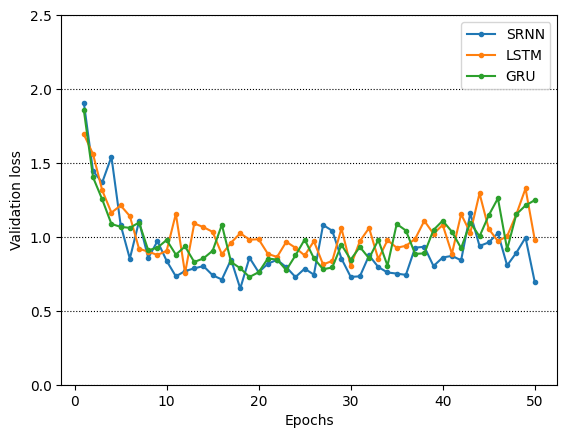

In [29]:
import matplotlib.pyplot as plt

plt.grid(axis="y", linestyle="dotted", color="k")

xs = np.arange(1, len(val_losses_stacked_bidir_masking_both_srnn_top10)+1)
plt.plot(xs, val_losses_stacked_bidir_masking_both_srnn_top10, label="SRNN", marker=".")
plt.plot(xs, val_losses_stacked_bidir_masking_both_lstm_top10, label="LSTM", marker=".")
plt.plot(xs, val_losses_stacked_bidir_masking_both_gru_top10, label="GRU", marker=".")
plt.xlabel("Epochs")
plt.ylabel("Validation loss")
plt.ylim([0.0, 2.5])
plt.legend()
plt.show()

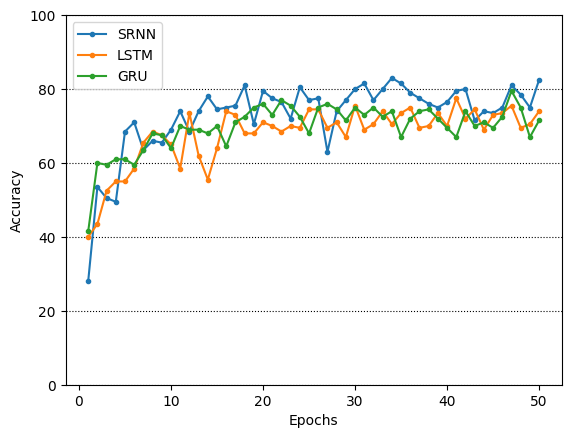

In [30]:
plt.grid(axis="y", linestyle="dotted", color="k")

xs = np.arange(1, len(test_accs_stacked_bidir_masking_both_srnn_top10)+1)
plt.plot(xs, test_accs_stacked_bidir_masking_both_srnn_top10, label="SRNN", marker=".")
plt.plot(xs, test_accs_stacked_bidir_masking_both_lstm_top10, label="LSTM", marker=".")
plt.plot(xs, test_accs_stacked_bidir_masking_both_gru_top10, label="GRU", marker=".")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.ylim([0.0, 100.0])
plt.legend()
plt.show()

In [31]:
print(f"SRNN: {test_accs_stacked_bidir_masking_both_srnn_top10.max()}")
print(f"LSTM: {test_accs_stacked_bidir_masking_both_lstm_top10.max()}")
print(f"GRU: {test_accs_stacked_bidir_masking_both_gru_top10.max()}")

SRNN: 83.0
LSTM: 77.5
GRU: 79.5


## 4.3 Compare layer types using top-30 dataset.

### Common settings

In [32]:
# Access check.
dataset_dir = Path("dataset_top30")
files = list(dataset_dir.iterdir())
dictionary = [fin for fin in files if ".json" in fin.name][0]
hdf5_files = [fin for fin in files if ".hdf5" in fin.name]

print(dictionary)
print(hdf5_files)

dataset_top30/sign_to_prediction_index_map.json
[PosixPath('dataset_top30/25571.hdf5'), PosixPath('dataset_top30/55372.hdf5'), PosixPath('dataset_top30/30680.hdf5'), PosixPath('dataset_top30/37779.hdf5'), PosixPath('dataset_top30/49445.hdf5'), PosixPath('dataset_top30/32319.hdf5'), PosixPath('dataset_top30/36257.hdf5'), PosixPath('dataset_top30/28656.hdf5'), PosixPath('dataset_top30/27610.hdf5'), PosixPath('dataset_top30/26734.hdf5'), PosixPath('dataset_top30/53618.hdf5'), PosixPath('dataset_top30/22343.hdf5'), PosixPath('dataset_top30/2044.hdf5'), PosixPath('dataset_top30/61333.hdf5'), PosixPath('dataset_top30/29302.hdf5'), PosixPath('dataset_top30/37055.hdf5'), PosixPath('dataset_top30/18796.hdf5'), PosixPath('dataset_top30/34503.hdf5'), PosixPath('dataset_top30/4718.hdf5'), PosixPath('dataset_top30/16069.hdf5'), PosixPath('dataset_top30/62590.hdf5')]


In [33]:
# Load dictionary.
with open(dictionary, "r") as fread:
    key2token = json.load(fread)

VOCAB = len(key2token)
out_channels = VOCAB

In [34]:
# Set common parameters.
train_hdf5files = [fin for fin in hdf5_files if str(test_pid) not in fin.name]
val_hdf5files = [fin for fin in hdf5_files if str(test_pid) in fin.name]
test_hdf5files = [fin for fin in hdf5_files if str(test_pid) in fin.name]

# Build dataloaders.
train_dataset = HDF5Dataset(train_hdf5files, pre_transforms=pre_transforms,
    transforms=transforms, load_into_ram=load_into_ram)
val_dataset = HDF5Dataset(val_hdf5files, pre_transforms=pre_transforms,
    transforms=transforms, load_into_ram=load_into_ram)
test_dataset = HDF5Dataset(test_hdf5files, pre_transforms=pre_transforms,
    transforms=transforms, load_into_ram=load_into_ram)

train_dataloader = DataLoader(train_dataset, batch_size=batch_size, collate_fn=merge_fn, num_workers=num_workers, shuffle=True)
val_dataloader = DataLoader(val_dataset, batch_size=batch_size, collate_fn=merge_fn, num_workers=num_workers, shuffle=False)
test_dataloader = DataLoader(test_dataset, batch_size=1, collate_fn=merge_fn, num_workers=num_workers, shuffle=False)

### SRNN

In [35]:
rnn_type="srnn"
rnn_num_layers = 2
rnn_bidir = True
masking_type = "both"

model = RNNISLR(in_channels=in_channels,
                hidden_channels=hidden_channels,
                out_channels=out_channels,
                rnn_type=rnn_type,
                rnn_num_layers=rnn_num_layers,
                rnn_bidir=rnn_bidir,
                masking_type=masking_type)
print(model)

loss_fn = nn.CrossEntropyLoss(reduction="mean")
optimizer = torch.optim.Adam(model.parameters(), lr=lr)

RNNISLR(
  (linear): Linear(in_features=260, out_features=64, bias=True)
  (activation): ReLU()
  (rnn): RNNEncoder(
    (rnn): RNN(64, 64, num_layers=2, batch_first=True, dropout=0.1, bidirectional=True)
    (dropout): Dropout(p=0.1, inplace=False)
  )
  (head): GPoolRecognitionHead(
    (head): Linear(in_features=128, out_features=30, bias=True)
  )
)


In [36]:
# Train, validation, and evaluation.
model.to(device)

val_losses = []
test_accs = []
print("Start training.")
for epoch in range(epochs):
    print("-" * 80)
    print(f"Epoch {epoch+1}")

    train_loop(train_dataloader, model, loss_fn, optimizer, device)
    val_loss = val_loop(val_dataloader, model, loss_fn, device)
    val_losses.append(val_loss)

    if (epoch+1) % eval_every_n_epochs == 0:
        acc = test_loop(test_dataloader, model, device)
        test_accs.append(acc)
val_losses_stacked_bidir_masking_both_srnn_top30 = np.array(val_losses)
test_accs_stacked_bidir_masking_both_srnn_top30 = np.array(test_accs)
print(f"Minimum validation loss:{val_losses_stacked_bidir_masking_both_srnn_top30.min()} at {np.argmin(val_losses_stacked_bidir_masking_both_srnn_top30)+1} epoch.")
print(f"Maximum accuracy:{test_accs_stacked_bidir_masking_both_srnn_top30.max()} at {np.argmax(test_accs_stacked_bidir_masking_both_srnn_top30)*eval_every_n_epochs+1} epoch.")

Start training.
--------------------------------------------------------------------------------
Epoch 1
Start training.
loss:3.455288 [    0/11480]
loss:2.979128 [ 3200/11480]
loss:2.587071 [ 6400/11480]
loss:2.211349 [ 9600/11480]
Done. Time:18.171386390999942
Training performance: 
 Avg loss:2.675061

Start validation.
Done. Time:0.6611984459998439
Validation performance: 
 Avg loss:2.498209

Start evaluation.
Done. Time:2.9721474710001985
Test performance: 
 Accuracy:20.1%
--------------------------------------------------------------------------------
Epoch 2
Start training.
loss:2.105927 [    0/11480]
loss:2.227420 [ 3200/11480]
loss:1.584833 [ 6400/11480]
loss:2.057545 [ 9600/11480]
Done. Time:24.85098125899981
Training performance: 
 Avg loss:1.924448

Start validation.
Done. Time:0.8762629020000077
Validation performance: 
 Avg loss:1.945643

Start evaluation.
Done. Time:3.133924193999974
Test performance: 
 Accuracy:43.3%
------------------------------------------------------

### LSTM

In [37]:
rnn_type="lstm"
rnn_num_layers = 2
rnn_bidir = True
masking_type = "both"

model = RNNISLR(in_channels=in_channels,
                hidden_channels=hidden_channels,
                out_channels=out_channels,
                rnn_type=rnn_type,
                rnn_num_layers=rnn_num_layers,
                rnn_bidir=rnn_bidir,
                masking_type=masking_type)
print(model)

loss_fn = nn.CrossEntropyLoss(reduction="mean")
optimizer = torch.optim.Adam(model.parameters(), lr=lr)

RNNISLR(
  (linear): Linear(in_features=260, out_features=64, bias=True)
  (activation): ReLU()
  (rnn): RNNEncoder(
    (rnn): LSTM(64, 64, num_layers=2, batch_first=True, dropout=0.1, bidirectional=True)
    (dropout): Dropout(p=0.1, inplace=False)
  )
  (head): GPoolRecognitionHead(
    (head): Linear(in_features=128, out_features=30, bias=True)
  )
)


In [38]:
# Train, validation, and evaluation.
model.to(device)

val_losses = []
test_accs = []
print("Start training.")
for epoch in range(epochs):
    print("-" * 80)
    print(f"Epoch {epoch+1}")

    train_loop(train_dataloader, model, loss_fn, optimizer, device)
    val_loss = val_loop(val_dataloader, model, loss_fn, device)
    val_losses.append(val_loss)

    if (epoch+1) % eval_every_n_epochs == 0:
        acc = test_loop(test_dataloader, model, device)
        test_accs.append(acc)
val_losses_stacked_bidir_masking_both_lstm_top30 = np.array(val_losses)
test_accs_stacked_bidir_masking_both_lstm_top30 = np.array(test_accs)
print(f"Minimum validation loss:{val_losses_stacked_bidir_masking_both_lstm_top30.min()} at {np.argmin(val_losses_stacked_bidir_masking_both_lstm_top30)+1} epoch.")
print(f"Maximum accuracy:{test_accs_stacked_bidir_masking_both_lstm_top30.max()} at {np.argmax(test_accs_stacked_bidir_masking_both_lstm_top30)*eval_every_n_epochs+1} epoch.")

Start training.
--------------------------------------------------------------------------------
Epoch 1
Start training.
loss:3.402940 [    0/11480]
loss:3.076479 [ 3200/11480]
loss:2.375165 [ 6400/11480]
loss:2.180435 [ 9600/11480]
Done. Time:19.087452485000085
Training performance: 
 Avg loss:2.770524

Start validation.
Done. Time:0.6598694979998072
Validation performance: 
 Avg loss:2.531755

Start evaluation.
Done. Time:2.6757918910002445
Test performance: 
 Accuracy:25.0%
--------------------------------------------------------------------------------
Epoch 2
Start training.
loss:2.095501 [    0/11480]
loss:1.825582 [ 3200/11480]
loss:1.815492 [ 6400/11480]
loss:1.771098 [ 9600/11480]
Done. Time:19.8747660250001
Training performance: 
 Avg loss:1.927767

Start validation.
Done. Time:0.6550622709996787
Validation performance: 
 Avg loss:2.124808

Start evaluation.
Done. Time:2.5264782859999286
Test performance: 
 Accuracy:34.6%
------------------------------------------------------

### GRU

In [39]:
rnn_type="gru"
rnn_num_layers = 2
rnn_bidir = True
masking_type = "both"

model = RNNISLR(in_channels=in_channels,
                hidden_channels=hidden_channels,
                out_channels=out_channels,
                rnn_type=rnn_type,
                rnn_num_layers=rnn_num_layers,
                rnn_bidir=rnn_bidir,
                masking_type=masking_type)
print(model)

loss_fn = nn.CrossEntropyLoss(reduction="mean")
optimizer = torch.optim.Adam(model.parameters(), lr=lr)

RNNISLR(
  (linear): Linear(in_features=260, out_features=64, bias=True)
  (activation): ReLU()
  (rnn): RNNEncoder(
    (rnn): GRU(64, 64, num_layers=2, batch_first=True, dropout=0.1, bidirectional=True)
    (dropout): Dropout(p=0.1, inplace=False)
  )
  (head): GPoolRecognitionHead(
    (head): Linear(in_features=128, out_features=30, bias=True)
  )
)


In [40]:
# Train, validation, and evaluation.
model.to(device)

val_losses = []
test_accs = []
print("Start training.")
for epoch in range(epochs):
    print("-" * 80)
    print(f"Epoch {epoch+1}")

    train_loop(train_dataloader, model, loss_fn, optimizer, device)
    val_loss = val_loop(val_dataloader, model, loss_fn, device)
    val_losses.append(val_loss)

    if (epoch+1) % eval_every_n_epochs == 0:
        acc = test_loop(test_dataloader, model, device)
        test_accs.append(acc)
val_losses_stacked_bidir_masking_both_gru_top30 = np.array(val_losses)
test_accs_stacked_bidir_masking_both_gru_top30 = np.array(test_accs)
print(f"Minimum validation loss:{val_losses_stacked_bidir_masking_both_gru_top30.min()} at {np.argmin(val_losses_stacked_bidir_masking_both_gru_top30)+1} epoch.")
print(f"Maximum accuracy:{test_accs_stacked_bidir_masking_both_gru_top30.max()} at {np.argmax(test_accs_stacked_bidir_masking_both_gru_top30)*eval_every_n_epochs+1} epoch.")

Start training.
--------------------------------------------------------------------------------
Epoch 1
Start training.
loss:3.378005 [    0/11480]
loss:3.024910 [ 3200/11480]
loss:2.283572 [ 6400/11480]
loss:2.263484 [ 9600/11480]
Done. Time:18.913166880000063
Training performance: 
 Avg loss:2.692648

Start validation.
Done. Time:0.6649610039999061
Validation performance: 
 Avg loss:2.536434

Start evaluation.
Done. Time:3.1897402020003938
Test performance: 
 Accuracy:22.2%
--------------------------------------------------------------------------------
Epoch 2
Start training.
loss:2.155956 [    0/11480]
loss:1.724915 [ 3200/11480]
loss:1.517112 [ 6400/11480]
loss:1.948762 [ 9600/11480]
Done. Time:21.076294884999697
Training performance: 
 Avg loss:1.839130

Start validation.
Done. Time:0.6581853910001882
Validation performance: 
 Avg loss:2.042229

Start evaluation.
Done. Time:2.4651824180000403
Test performance: 
 Accuracy:36.2%
----------------------------------------------------

### Plot result

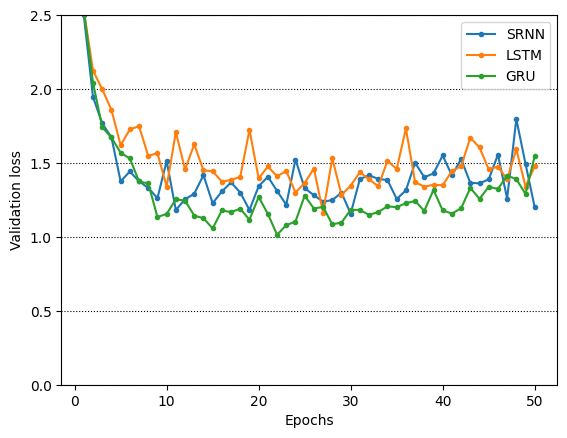

In [41]:
import matplotlib.pyplot as plt

plt.grid(axis="y", linestyle="dotted", color="k")

xs = np.arange(1, len(val_losses_stacked_bidir_masking_both_srnn_top30)+1)
plt.plot(xs, val_losses_stacked_bidir_masking_both_srnn_top30, label="SRNN", marker=".")
plt.plot(xs, val_losses_stacked_bidir_masking_both_lstm_top30, label="LSTM", marker=".")
plt.plot(xs, val_losses_stacked_bidir_masking_both_gru_top30, label="GRU", marker=".")
plt.xlabel("Epochs")
plt.ylabel("Validation loss")
plt.ylim([0.0, 2.5])
plt.legend()
plt.show()

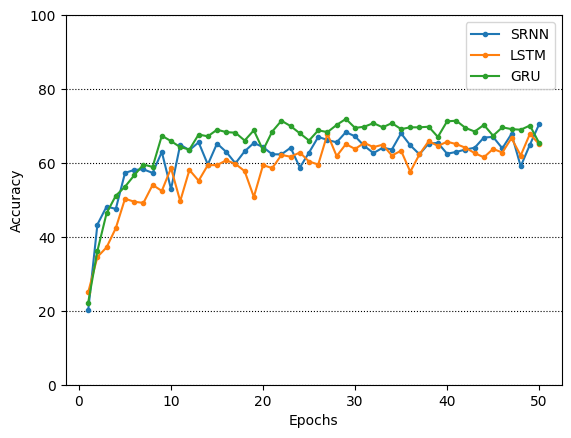

In [42]:
plt.grid(axis="y", linestyle="dotted", color="k")

xs = np.arange(1, len(test_accs_stacked_bidir_masking_both_srnn_top30)+1)
plt.plot(xs, test_accs_stacked_bidir_masking_both_srnn_top30, label="SRNN", marker=".")
plt.plot(xs, test_accs_stacked_bidir_masking_both_lstm_top30, label="LSTM", marker=".")
plt.plot(xs, test_accs_stacked_bidir_masking_both_gru_top30, label="GRU", marker=".")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.ylim([0.0, 100.0])
plt.legend()
plt.show()

In [43]:
print(f"SRNN: {test_accs_stacked_bidir_masking_both_srnn_top30.max()}")
print(f"LSTM: {test_accs_stacked_bidir_masking_both_lstm_top30.max()}")
print(f"GRU: {test_accs_stacked_bidir_masking_both_gru_top30.max()}")

SRNN: 70.45454545454545
LSTM: 67.85714285714286
GRU: 71.9155844155844
